#### Lecture 1. Graph intro

1. 그래프란
- Graph : 정점 집합 + 간선(정점을 연결하는 선분) 집합 인 수학적 구조
- graph = network, 정점(vertex) = node, 간선(edge) = link
- 복잡계(complex system)의 구성요소간의 상호작용을 표현하는 언어
- graph $ G = (V, E) $
- 정점의 이웃(neighbor)은 그 정점과 연결된 다른 정점을 의미
    - 정점 v의 이웃 집합 $ N(v) $ or $N_v $
    - 방향성이 있는 경우는 들어오는 이웃과 나가는 이웃을 구분
- 메신저, 웹, 전자상거래, 뇌, 화학 분자, 지식 그래프 모두 복잡계의 일종

2. 그래프 관련 인공지능
- 정점 분류(node classification)
- 연결 예측 문제 : 그래프가 어떻게 성장할까(거시적) / 각 정점이 어떤 정점과 연결될까(미시적, 추천 시스템)
- 군집 분석(clustering) : 연결관계로부터 사회적 무리(social circle) 찾기
- 랭킹 및 정보 검색 문제
- 정보 전파 / 바이럴 마케팅 문제

3. 그래프 분류
- 방향의 유무(directed / undirected)
    - 협업, 친구 등 관계가 대등 // 인용, follow
- 가중치의 유무(weighted / unweighted)
    - 웹, 친구 // 전화, 유사도.. 분석 상황, 데이터에 따라 기준은 바뀔 수 있음
- 정점의 종류(동종 unpartite / 이종 bipartite)
    - 이종의 경우 두 종류의 정점을 가지며 다른 종류사이에만 정점 연결됨

4. 파이썬 라이브러리
- networkX(사용 편리), snap.py(속도 빠름)

In [1]:
!pip install networkx

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("##### Graph Init #####")
G = nx.Graph() # 방향성이 없는 그래프 초기화
DiGraph = nx.DiGraph() # 방향성이 있는 그래프 초기화

##### Graph Init #####


In [4]:
# 정점 추가
for i in range(1,11):
    G.add_node(i)
print("Num of nodes in G : " + str(G.number_of_nodes()))
print("Graph : " + str(G.nodes) + "\n")

Num of nodes in G : 10
Graph : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]



In [5]:
# 간선 추가
for i in range(2,11):
    G.add_edge(1,i)
print("Graph : " + str(G.edges) + "\n")

Graph : [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10)]



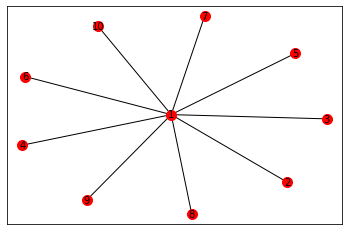

In [6]:
# 그래프 시각화
pos = nx.spring_layout(G) # 정점 위치 결정
im = nx.draw_networkx_nodes(G, pos, node_color='red', node_size=100)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
plt.show()

5. 그래프의 표현 및 저장
- 간선 리스트 : 간선(두 정점 순서쌍으로 표현) 리스트로 저장(단순하나 비효율적)
    - 방향성 그래프는 (출발점, 도착점) 순서로 저장
- 인접 리스트 : 각 정점의 이웃들을 리스트로 저장
    - 방향성이 있는 경우 나가는 이웃과 들어오는 이웃을 각각 리스트로 저장
- 인접 행렬(adjacency matrix)
    - 정점 i, j 사이에 간선이 있는 경우 $M_{ij}=1 $ 아니면 0
        - 대각행렬이 될 수 밖에 없음
    - 방향성이 있는 경우는 정점 i에서 j로의 간선이 있는 경우 $M_{ij}=1 $ 아니면 0
    - 일반행렬은 전체원소를 저장하므로 정점수의 제곱에 해당하는 공간 사용
    - 희소행렬은 0이 아닌 원소만을 저장하므로 간선 수에 해당하는 공간 사용
    - 희소행렬이 메모리를 절약하지만 0이 아닌 값이 대다수일 경우 계산 속도가 느림

#### Lecture 2. Graph Property

그래프 필수 개념
- 정점 u와 v사이의 경로(path)는 아래 조건을 만족하는 정점들의 순열
    - u에서 시작해서 v에서 끝남, 연속된 정점은 간선으로 연결됨
    - 같은 정점이 등장해도 상관없음
- 경로의 길이 : 해당 경로상의 간선의 수
- 정점 u와 v의 사이의 거리(distance)는 u와 v 사이의 최단 경로의 길이
- 그래프의 지름(diameter) : 정점 간 거리의 최댓값

graph 분류
- 실제 그래프 : 다양한 복잡계로부터 얻어진 그래프 ex)MSN 메신저 그래프
- 랜덤 그래프 : 확률 과정을 통해 생성한 그래프
    - 에르되스-레니 랜덤 그래프 G(n,p)
        - n 개의 정점, 임의의 두 개의 정점 사이에 간선이 존재할 확률 p, 연결이 독립적

실제 그래프의 특성

1. 작은 세상 효과(small world effect : 임의의 두 정점 사이의 거리가 생각보다 작다)
- 여섯 단계 분리 실험
    - 오마바/위치타 ~ 보스턴까지 지인을 통해 편지를 전달시킴(1960년대)
    - 25% 의 편지만 도착했지만 평균 6단계만을 거침
- MSN 메신저 그래프 : 정점간의 평균거리가 7
- 체인, 사이클, 격자 그래프에는 작은 세상 효과가 존재하지 않음

2. 연결성의 두터운 꼬리 분포
- 연결성 : 그 정점과 연결된 간선의 수 $ d(v) $, $ d_v $
- 실제 그래프의 연결성 분포는 두터운 꼬리(heavy tail)를 지님
- 연결성이 매우 높음 허브(hub) 정점이 존재함을 의미
- 랜덤 그래프의 연결성 분포는 높은 확률로 정규 분포와 유사 ex) 사람의 키

3. 거대 연결 요소
- 연결요소 : 정점들의 집합으로 연결 요소에 속하는 정점들이 경로로 연결될 수 있으며 정점을 추가할 수 없는 집합
- 실제 그래프에는 대다수의 정점을 포함하는 거대 연결 요소가 존재
    - ex) MSN 메신저 : 99.9% 의 정점이 하나의 거대 연결 요소에 포함됨
- 랜덤 그래프도 평균 연결성이 1보다 충분히 클 경우 거대 연결 요소가 높은 확률로 존재

4. 군집 구조
- 군집(community) : 정점들의 집합으로 집합에 속하는 정점 사이에는 많은 간선이 존재
- 지역적 군집계수(local clustering coefficient) $C_i$ : 정점 i의 이웃 쌍 중 간선으로 직접 연결된 것의 비율
- 각 정점의 지역적 군집계수가 높을 수록 그 정점들이 군집을 형성할 확률이 높음
- 전역 군집 계수(global clustering coefficient) : 지역적 군집계수의 평균
- 실제 그래프는 군집 계수가 높음(많은 군집 존재)
    - 동질성(homophily) : 서로 유사한 정점끼리 간선으로 연결됨
    - 전이성(transitivity) : 공통 이웃이 매개 역할
- 랜덤 그래프는 군집 계수가 높지 않음 G(n,p) 의 군집 계수는 p

실습
https://colab.research.google.com/drive/1ERMqKOq_TOyhtS18W5snqHbuGWZelcdR?usp=sharing

#### peer session

NLP Further question 토의
1. Word2Vec과 GloVe 알고리즘이 가지고 있는 단점은 무엇일까요?
- 동음이의어 문제. 동음이의어를 학습 과정에서 동일한 단어로 간주하고 처리하여 둘을 같은 단어로 벡터 공간상에 매핑 
2. BPTT 이외에 RNN/LSTM/GRU의 구조를 유지하면서 gradient vanishing/exploding 문제를 완화할 수 있는 방법이 있을까요?
- 양방향으로 학습, 핍홀 연결 (보다 완전한 정보를 가진 cell state를 각 gate 입력에 추가함으로 좀더 많은 context 인식)
말 그대로 문제 완화, 해결하는 방법은 아닌 것 같다.
3. BLEU score가 번역 문장 평가에 있어서 갖는 단점은 무엇이 있을까요?
- 의미를 고려하지 않음. 문맥을 고려하지 않음. 사람이 생각하는 것과 차이가 있음. 짧을 단어일수록 성능을 좋게 평가.
4. Attention은 이름 그대로 어떤 단어의 정보를 얼마나 가져올 지 알려주는 직관적인 방법처럼 보입니다. Attention을 모델의 Output을 설명하는 데에 활용할 수 있을까요?
- 딥러닝은 blackbox모델, 비선형 변환으로 인해 layer가 깊어질수록 어떤 변수가 중요한지 설명할 수 없음. 
5. BERT의 Masked Language Model의 단점은 무엇이 있을까요? 사람이 실제로 언어를 배우는 방식과의 차이를 생각해보며 떠올려봅시다
-  pretrain 당시 주어진 입력 데이터의 패턴이 메인 task를 수행할 때 주어지는 입력 데이터와는 다른 특성을 보일 수 있어 상이한 차이점이 학습을 방해하거나 transfer learning의 효과를 최대화 하는데 문제가 될 수 있음. 